In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.1 MB 1.5 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/16.1 MB 2.7 MB/s eta 0:00:06
   -------- ------------------------------- 3.4/16.1 MB 4.1 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.1 MB 6.5 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.1 MB 8.0 MB/s eta 0:00:01
   --------------------------------- ------ 13.4/16.1 MB 9.1 MB/s eta 0:00:01
   --------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import mysql.connector
from mysql.connector import Error
# Step 1: Database connection
connection = mysql.connector.connect(
    host='localhost',       
    user='root',            
    password='Guru@200403',    
    database='weatherdb',
    port='3306'
)

cursor = connection.cursor()

# Step 2: Load dataset
# Replace 'your_file.csv' with your dataset file path
file_path = 'weather.csv'
data = pd.read_csv(file_path)

# Step 3: Insert data into MySQL
insert_query = """
INSERT INTO weatherdata ()
VALUES (%s, %s, %s, %s, %s, %s)
"""

try:
    for index, row in data.iterrows():
        cursor.execute(insert_query, (row['date'], row['precipitation'], row['temp_max'], row['temp_min'], row['wind'], row['weather']))
        if index % 5 == 0: 
            connection.commit()
    connection.commit()  # Final commit after all rows
    print(f"{len(data)} rows inserted successfully.")
except Exception as e:
    print("Error:", e)
finally:
    cursor.close()
    connection.close()

1461 rows inserted successfully.


In [ ]:
# Displaying the dataset
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
# Display first 5 rows
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
# Display last 5 rows
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [8]:
# The number of rows and columns
data.shape

(1461, 6)

In [9]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 1461
Number of Columns: 6


In [10]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [11]:
# Checking for NULL values (Boolean values)
data.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [12]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [14]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [15]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\758220560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")


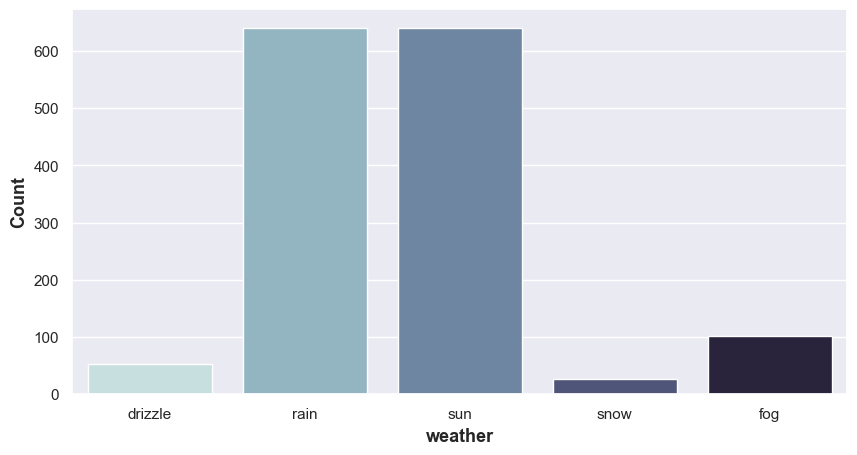

In [16]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

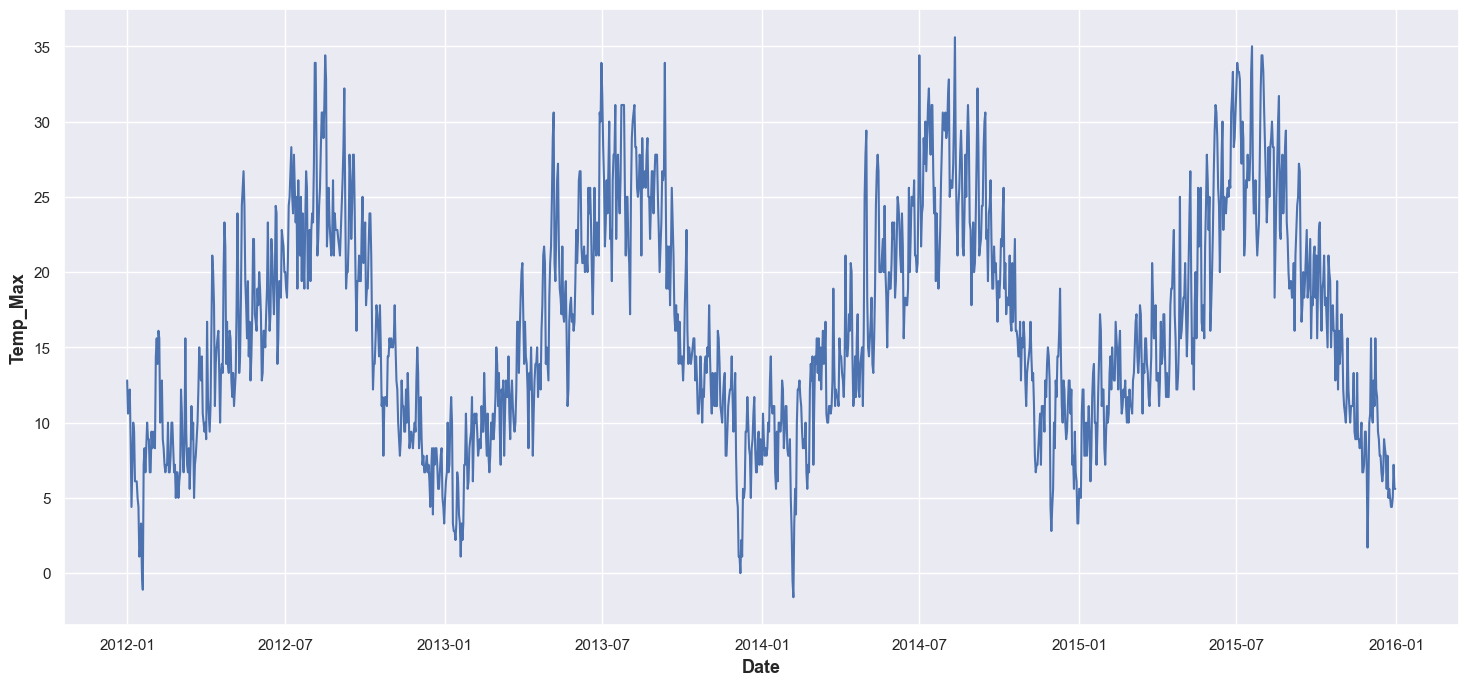

In [17]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

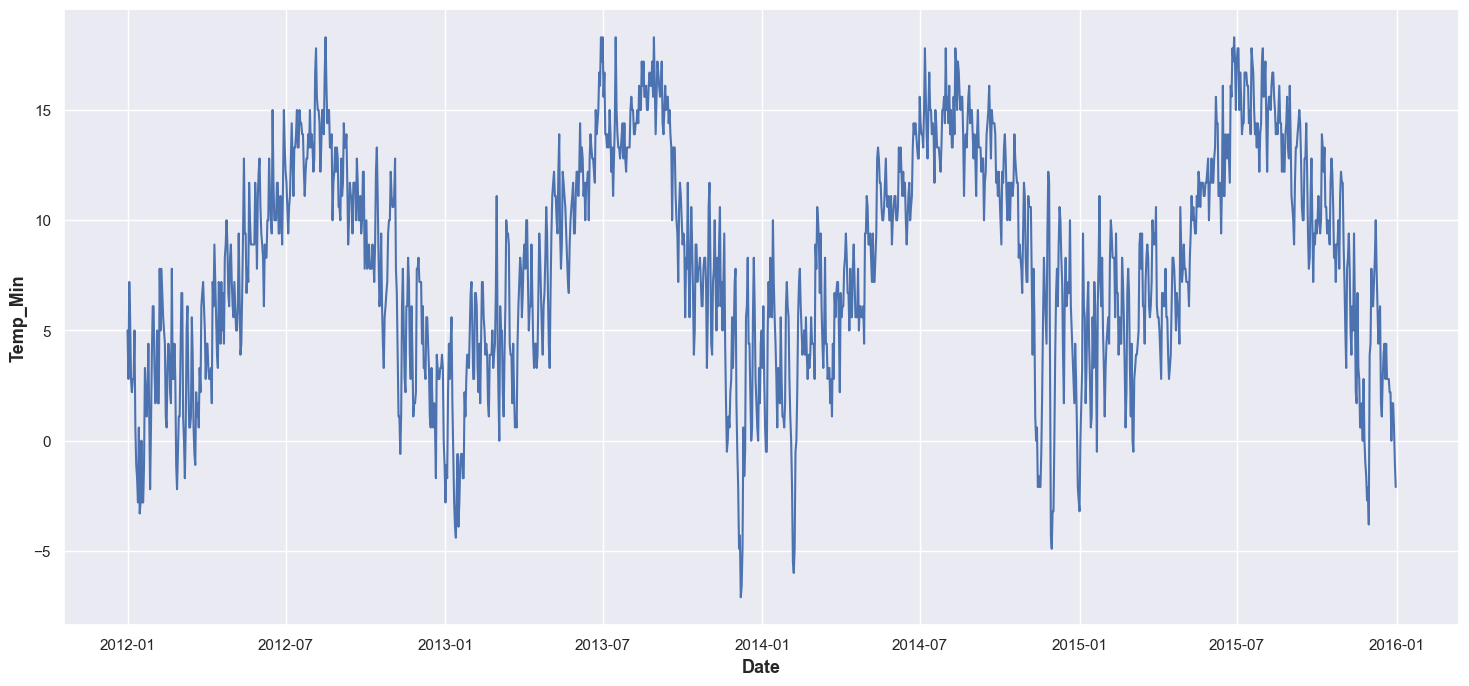

In [18]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

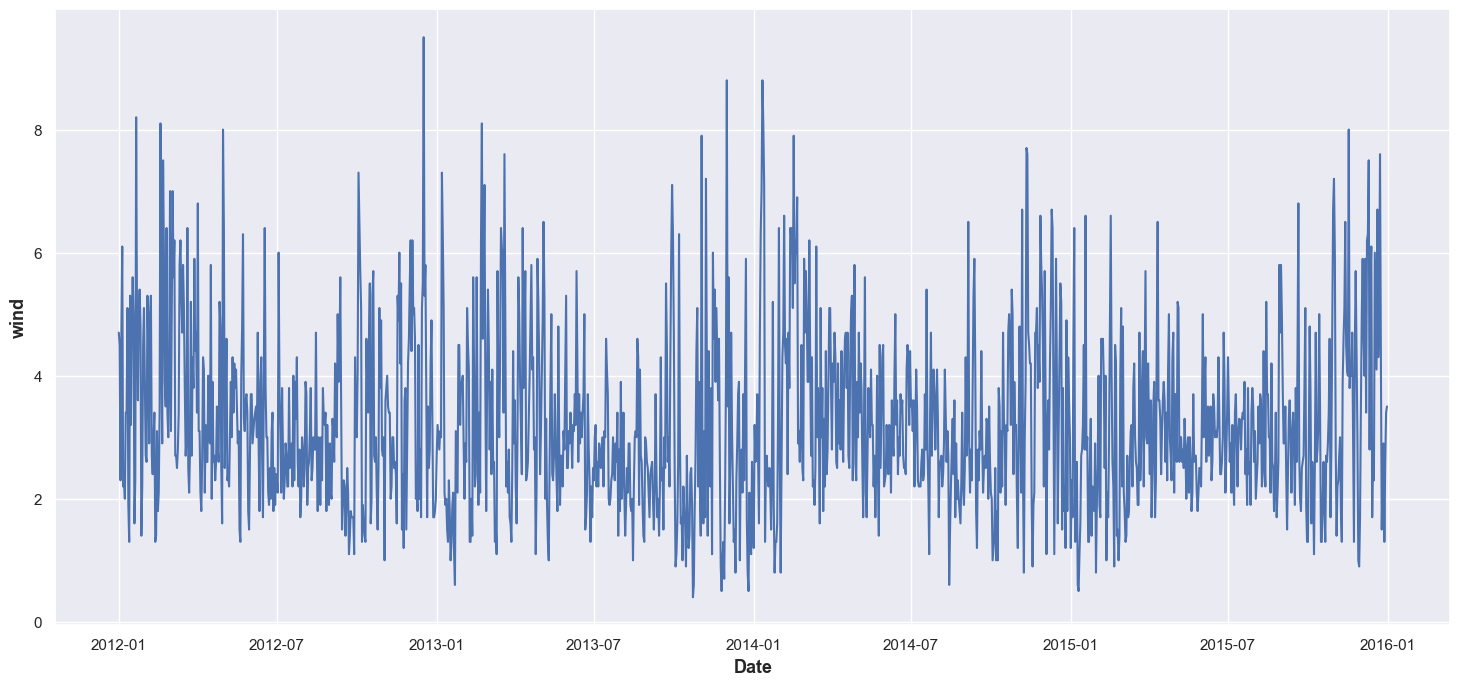

In [19]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

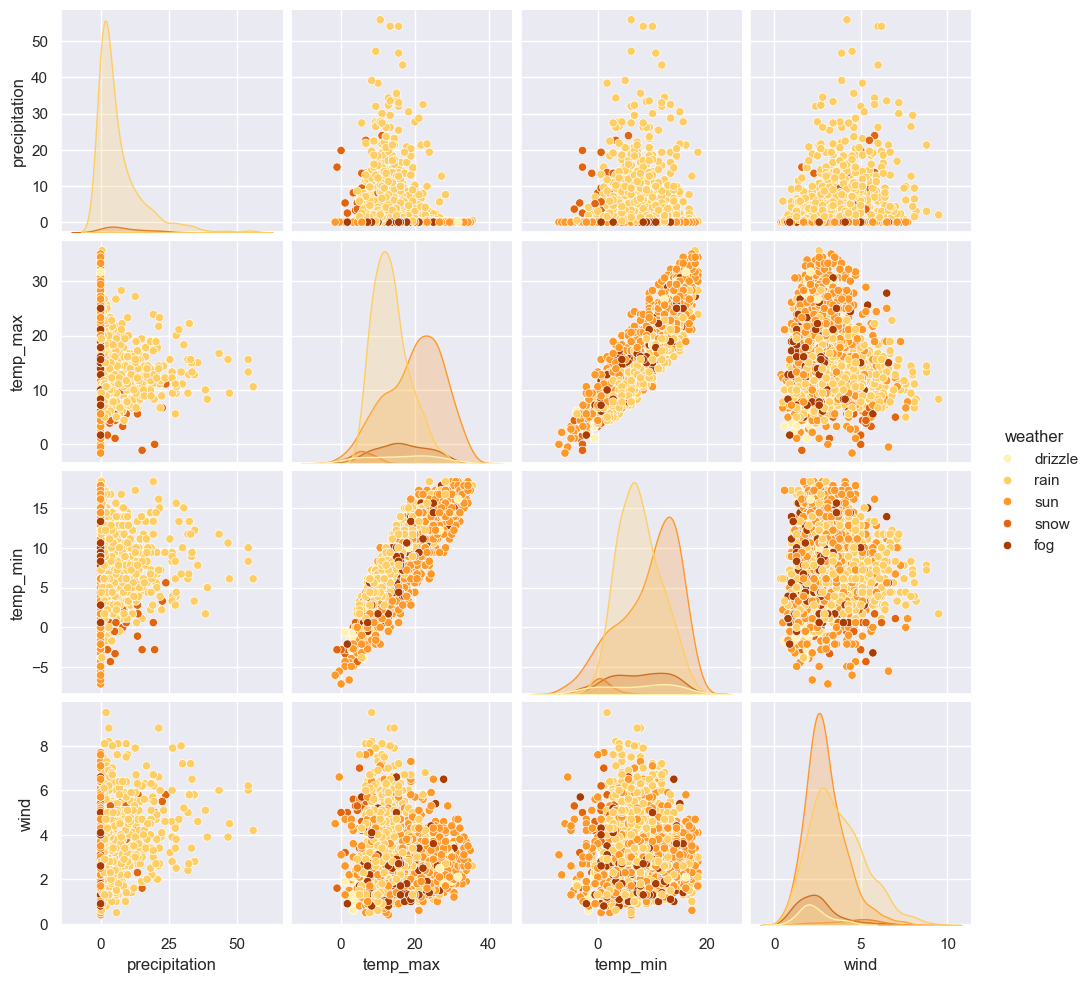

In [20]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\3814060822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")


<Figure size 1000x500 with 0 Axes>

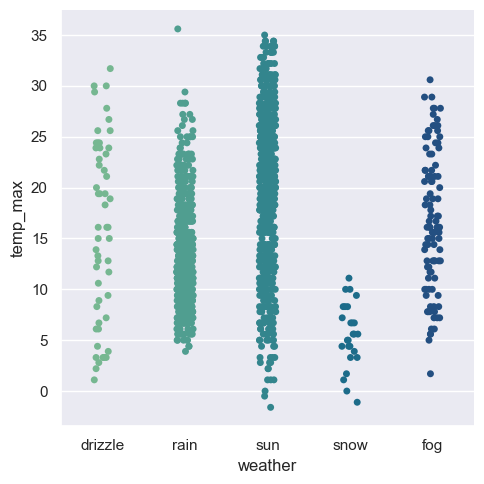

In [21]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\1093999663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

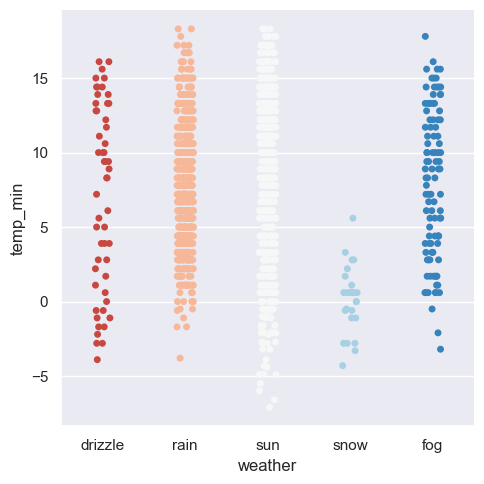

In [22]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\1991129908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='wind',data=data,palette = "magma")


<Figure size 1000x500 with 0 Axes>

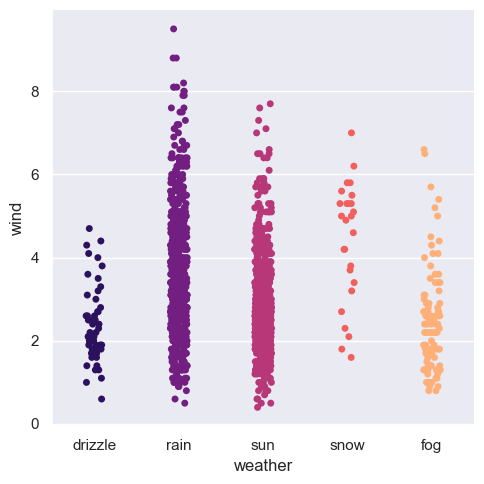

In [23]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\1492132081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")


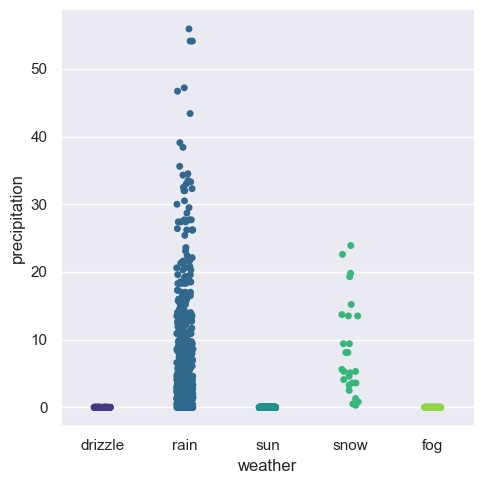

In [24]:
sns.catplot(x='weather',y ='precipitation',data=data,palette = "viridis")
plt.show()

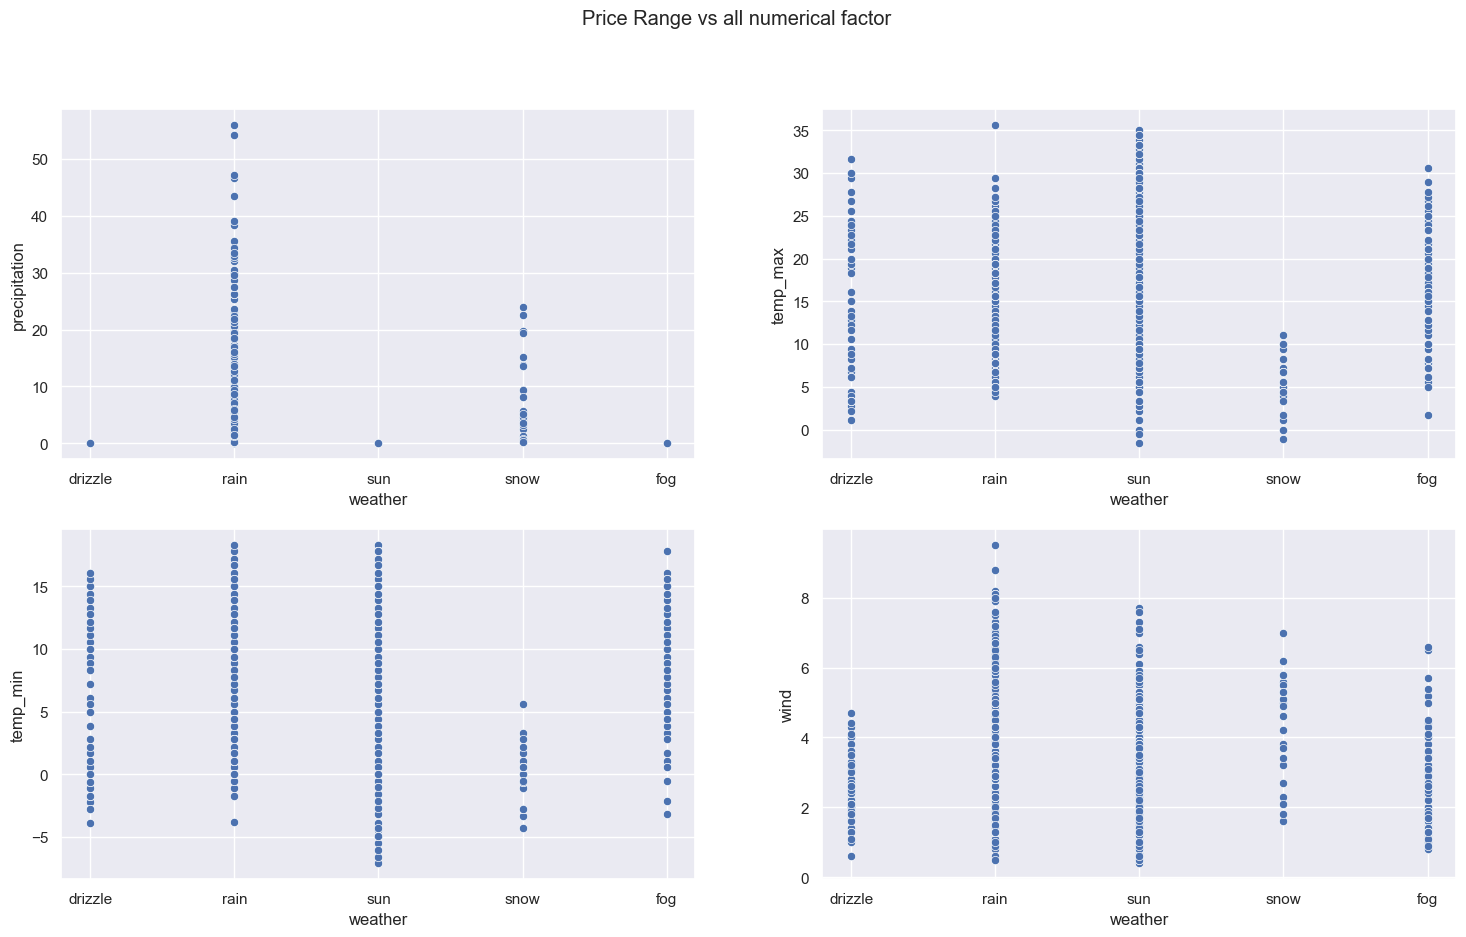

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

In [26]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [27]:
data = data.drop('date',axis=1)

In [28]:
x = data.drop('weather',axis=1)
y = data['weather']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


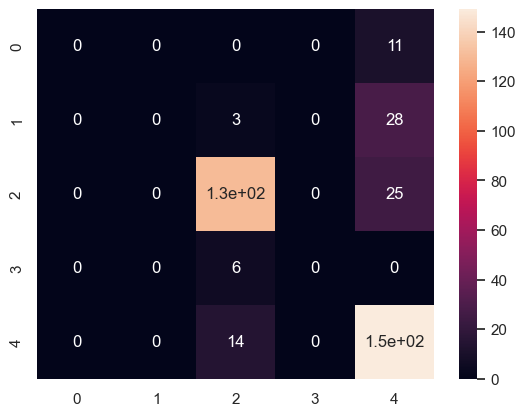

In [36]:
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131


In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)
print("accuracy=", acc2)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 126   0  29]
 [  0   0   4   2   0]
 [  0   0   0   0 163]]
accuracy= 0.7950819672131147


In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [46]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.6775956284153005


In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


In [50]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8415300546448088


In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
y_pred

array([4, 0, 2, 4, 4, 2, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 4, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 1, 4, 2, 2, 3, 2, 0, 1, 4, 2, 0, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 4, 0, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 4, 2,
       1, 2, 0, 4, 2, 4, 4, 0, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 0,
       2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 0, 2, 4, 0, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       1, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 1, 2, 4, 2, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 2, 2, 1, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2,

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]


<Axes: >

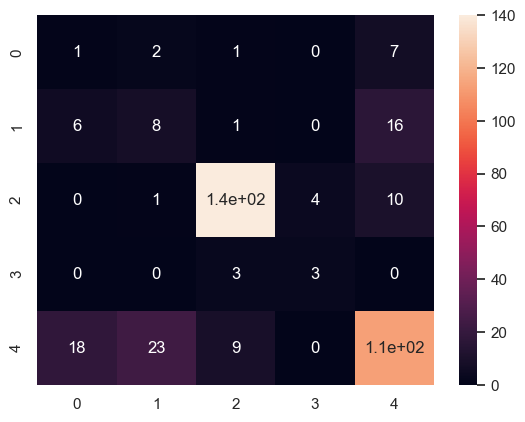

In [55]:
sns.heatmap(cm,annot=True)

In [56]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.7240437158469946


In [57]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

<Axes: >

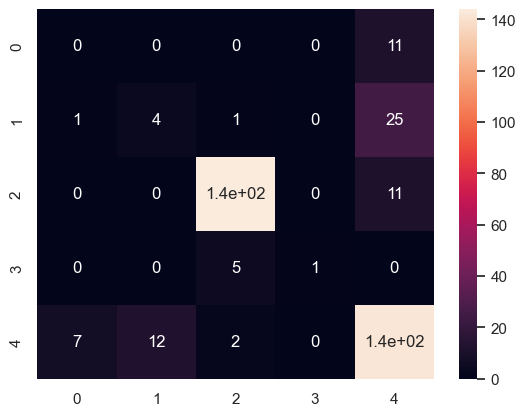

In [58]:
sns.heatmap(cm,annot=True)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.25      0.13      0.17        31
           2       0.95      0.93      0.94       155
           3       1.00      0.17      0.29         6
           4       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.42      0.44       366
weighted avg       0.77      0.80      0.78       366



In [62]:
acc6 = forest.score(X_test,y_test)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.7950819672131147


In [64]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.4 MB/s eta 0:01:30
    --------------------------------------- 1.6/124.9 MB 2.6 MB/s eta 0:00:48
   - -------------------------------------- 3.1/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 6.0/124.9 MB 6.1 MB/s eta 0:00:20
   -- ------------------------------------- 9.2/124.9 MB 7.7 MB/s eta 0:00:16
   --- ------------------------------------ 10.7/124.9 MB 8.4 MB/s eta 0:00:14
   ----- ---------------------------------- 17.0/124.9 MB 11.0 MB/s eta 0:00:10
   ----- -------------

In [65]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[  0   1   0   0  10]
 [  2   4   1   0  24]
 [  0   1 144   0  10]
 [  0   0   5   1   0]
 [  9  14   2   0 138]]


In [67]:
print(f"Accuracy score: {acc7}")

Accuracy score: 0.7841530054644809


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20128\3860968744.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)


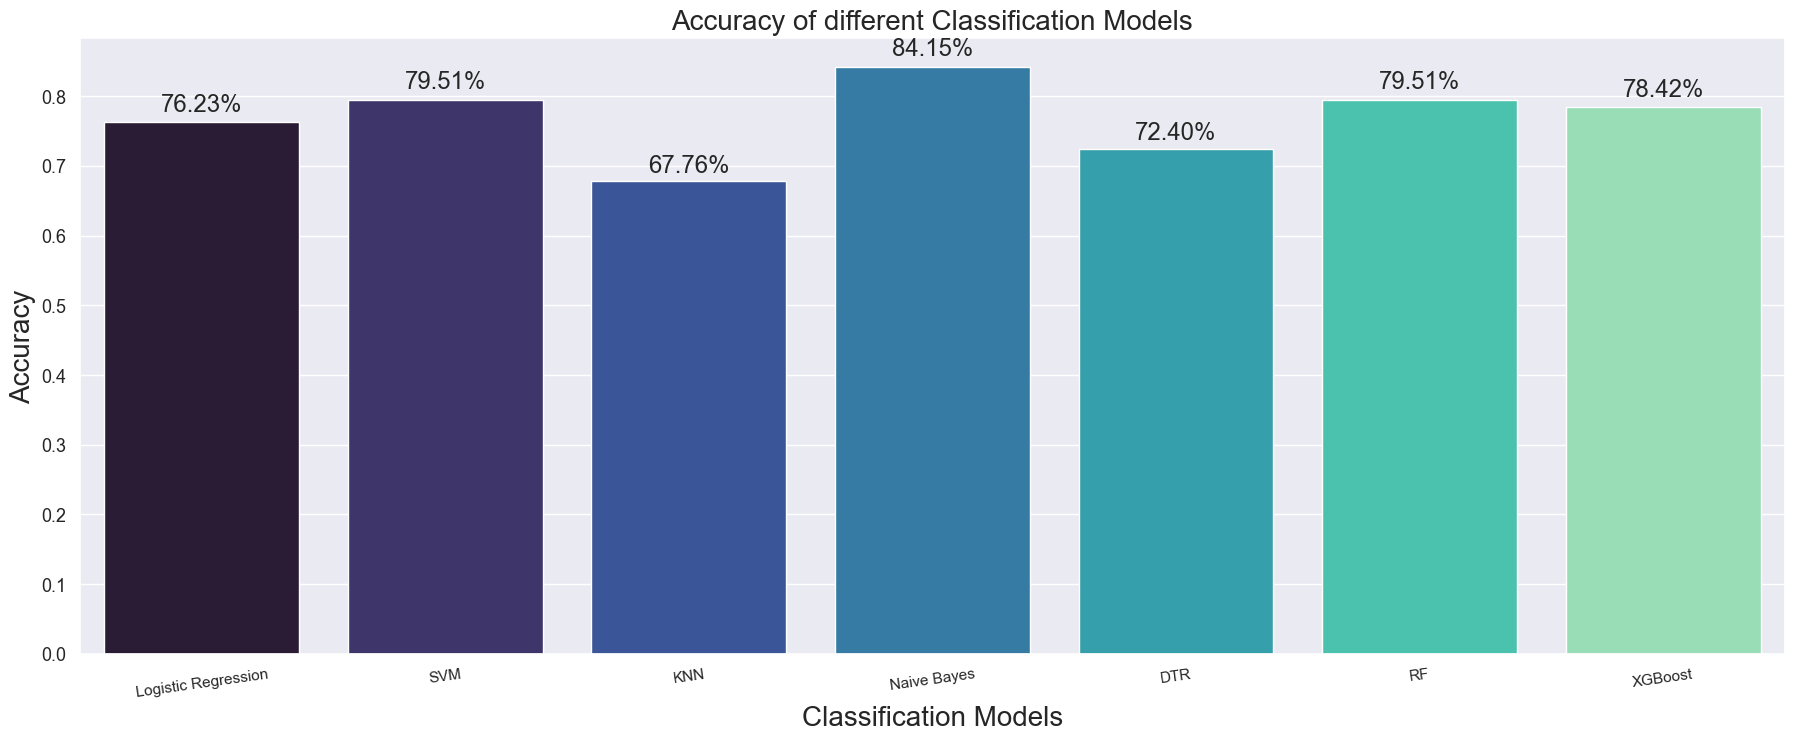

In [68]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()